## Objectives

Perform exploratory Data Analysis and determine Training Labels

* create a column for the class
* Standardize the data
* Split into training data and test data

-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

* Find the method performs best using test data

In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# function to plot the confusion matrix
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [4]:
dftest = pd.read_csv('C:/Users/rihar/OneDrive/Dators/macibu materials/coursera/pitonis/DataScience Capstone/dataset_part_2.csv')
dftrain = pd.read_csv('C:/Users/rihar/OneDrive/Dators/macibu materials/coursera/pitonis/DataScience Capstone/dataset_part_3.csv')

### Task 1

In [5]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
daf = pd.read_csv(URL1)
daf

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


In [6]:
dftrain

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15600.000000,2.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15600.000000,3.0,1.0,1.0,1.0,5.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15600.000000,6.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15600.000000,3.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
#create a numpy array from the column class in dftest by applying to_numpy()
arr = dftest['Class'].to_numpy()
Y = pd.Series(arr)

### Task 2

In [30]:
#standardize the data in X then reassign it to the variable X using the transform provided
from sklearn.preprocessing import StandardScaler

Clus_dataSet = StandardScaler().fit_transform(dftrain)
X = Clus_dataSet

### Task 3

In [31]:
#create a train test split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [32]:
ytest.shape

(18,)

### Task 4

In [33]:
#create a logistic regression biiitch then create a GridSearchCV object logreg_cv with cv=10
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [34]:
parameters ={"C":[0.01,0.11,0.12,0.13,0.1,1,],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr,parameters,cv=10)
logreg_cv.fit(xtrain,ytrain)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.13, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8357142857142856


this all on the train data

### Task 5

In [35]:
# test the accuracy with score ( on test data i guess?)
accte = logreg_cv.score(xtest,ytest)
acctr = logreg_cv.score(xtrain,ytrain)
accte

0.8333333333333334

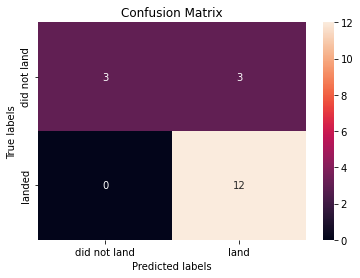

In [36]:
#man juska ka kkas nav kaa jaabuut
yhat=logreg_cv.predict(xtest)
plot_confusion_matrix(ytest,yhat)

In [37]:
print(classification_report(ytest,yhat))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



da problem is false positives

### Task 6

In [38]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm,parameters,cv = 10)
svm_cv.fit(xtrain,ytrain)
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142858


### Task 7

In [39]:
# test the accuracy with score ( on test data i guess?)
accte = svm_cv.score(xtest,ytest)
acctr = svm_cv.score(xtrain,ytrain)

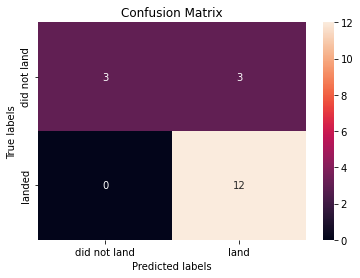

In [40]:
#man juska ka kkas nav kaa jaabuut
yhat=svm_cv.predict(xtest)
plot_confusion_matrix(ytest,yhat)

In [41]:
print(classification_report(ytest,yhat))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



### Task 8

Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [42]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree,parameters,cv = 10)
tree_cv.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [43]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.8892857142857142


### Task 9

In [44]:
# Calculate the accuracy of tree_cv on the test data using the method score:
accte = tree_cv.score(xtest,ytest)

accte

0.8333333333333334

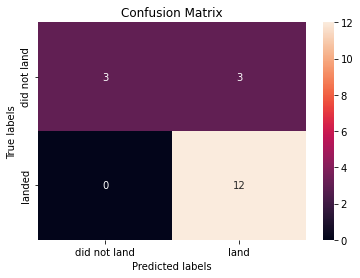

In [45]:
yhat = tree_cv.predict(xtest)
plot_confusion_matrix(ytest,yhat)

In [46]:
print(classification_report(ytest,yhat))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



### Task 10

In [47]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN,parameters,cv = 10)
knn_cv.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [48]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy : 0.8339285714285714


### Task 11

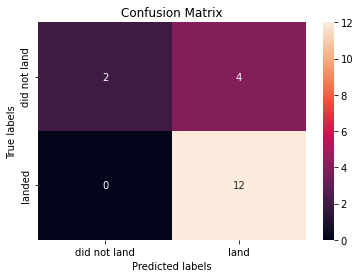

In [49]:
accte = knn_cv.score(xtest,ytest)
yhat = knn_cv.predict(xtest)
plot_confusion_matrix(ytest,yhat)

In [50]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(ytest,yhat))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.75      1.00      0.86        12

    accuracy                           0.78        18
   macro avg       0.88      0.67      0.68        18
weighted avg       0.83      0.78      0.74        18



### Task 12

In [51]:
#Find the method performs best:
print("logistic regression training accuracy :",logreg_cv.best_score_) #83% on test
print("svm training accuracy :",svm_cv.best_score_)#83 on test
print(" decision tree training accuracy :",tree_cv.best_score_)#83% on test
print("kmeans training accuracy :",knn_cv.best_score_) #78% on test

logistic regression training accuracy : 0.8357142857142856
svm training accuracy : 0.8482142857142858
 decision tree training accuracy : 0.8892857142857142
kmeans training accuracy : 0.8339285714285714


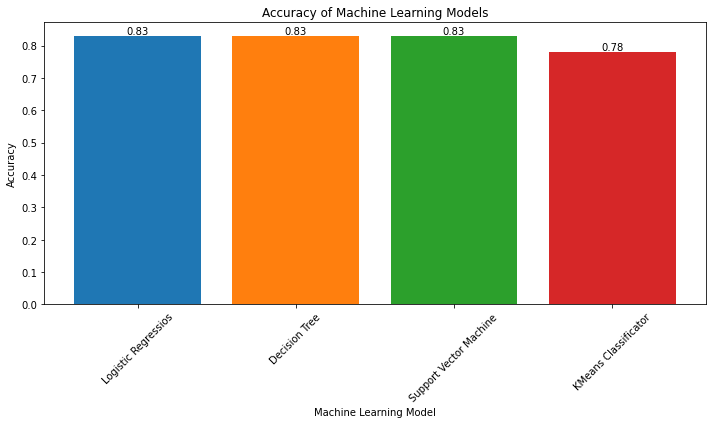

In [76]:
data = {
    'Machine Learning Model': ['Logistic Regressios', 'Decision Tree', 'Support Vector Machine', 'KMeans Classificator'],
    'Accuracy': [0.83, 0.83, 0.83, 0.78]
}
df = pd.DataFrame(data)
# df.set_index('Machine Learning Model', inplace=True)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
# df.plot.bar(df['Machine Learning Model'], df['Accuracy'],figsize=(7, 10), color = colors)
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Machine Learning Model'], df['Accuracy'], color=colors )

# Add labels and title
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Machine Learning Models')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')


# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

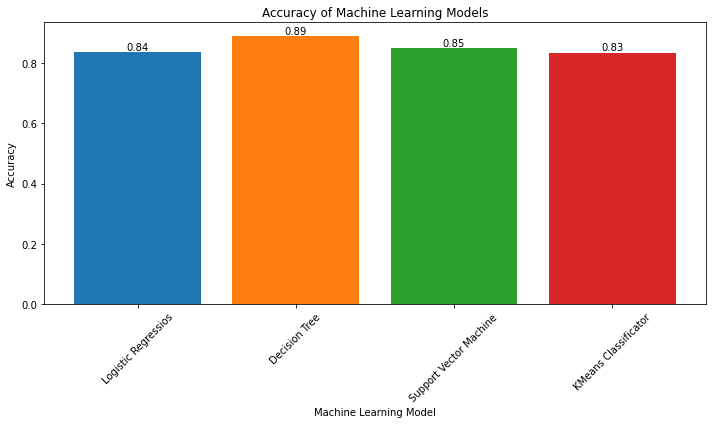

In [74]:
dt = {
    'ML Model':['Logistic Regressios', 'Decision Tree', 'Support Vector Machine', 'KMeans Classificator'],
    'Accuracy':[0.8357142857142856 ,0.8892857142857142 ,0.8482142857142858 ,0.8339285714285714]
}
dfs = pd.DataFrame(dt)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
plt.figure(figsize=(10, 6))
bars = plt.bar(dfs['ML Model'], dfs['Accuracy'], color=colors )
# Add labels and title
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Machine Learning Models')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')


# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()